# Credit Worthiness

The high level aim of the analysis is to come up with the most optimal statistical model for predicting the creditworthiness.The banking usually utilizes it as a method to support the decision-making about credit applications.Nowadays, creditworthiness is very important for everyone since it is regarded as an indicator for how dependable an individual is. In various situations, service suppliers need to evaluate customers’ credit history first, and then decide whether they will provide the service or not.It is widely applied in many industries especially in the banking. The banks usually use it to determine who should get credit, how much credit they should receive, and which operational strategy can be taken to reduce the credit risk.

Importing important required libraries

## Solution Overview


We will follow the following suggestive steps to build the model:

Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

Derive new features.

Reduce the number of variables using PCA if required.

Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques if required).

Evaluate the models using appropriate evaluation metrics. Choose an appropriate evaluation metric which reflects this business goal.

Finally, choose a model based on some evaluation metric.

In [1]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import scale

# import for model selection:
# splitting data into training, test data and validation data
from sklearn.model_selection import train_test_split
# Import for scaling dataframe
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# import for report of model performance (useful for classification models)
from sklearn import metrics
# import for Stratified K fold
from sklearn.model_selection  import StratifiedKFold
# import for Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
#import for SVM
from sklearn import svm
# import for Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Checking version of imported libraries
np.__version__, pd.__version__, sns.__version__

('1.16.3', '0.24.2', '0.9.0')

## Importing Dataset

In [3]:
# Reading data from txt file
df=pd.read_csv("ModelingData.txt",delimiter='\t')
# Looking top5 data
df.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1.0,0.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,67.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0
1,2.0,1.0,48.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,22.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0
2,3.0,3.0,12.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,...,49.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0
3,4.0,0.0,42.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,45.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0
4,5.0,0.0,24.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,53.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0


# Understanding Dataset

In [4]:
df.describe()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,...,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000
std,288.819436,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,...,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,500.500000,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,750.250000,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1000.000000,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 32 columns):
OBS#                1000 non-null float64
CHK_ACCT            1000 non-null float64
DURATION            1000 non-null float64
HISTORY             1000 non-null float64
NEW_CAR             1000 non-null float64
USED_CAR            1000 non-null float64
FURNITURE           1000 non-null float64
RADIO/TV            1000 non-null float64
EDUCATION           1000 non-null float64
RETRAINING          1000 non-null float64
AMOUNT              1000 non-null float64
SAV_ACCT            1000 non-null float64
EMPLOYMENT          1000 non-null float64
INSTALL_RATE        1000 non-null float64
MALE_DIV            1000 non-null float64
MALE_SINGLE         1000 non-null float64
MALE_MAR_or_WID     1000 non-null float64
CO-APPLICANT        1000 non-null float64
GUARANTOR           1000 non-null float64
PRESENT_RESIDENT    1000 non-null float64
REAL_ESTATE         1000 non-null float64
PROP_UNKN_N

In [6]:
df.shape

(1002, 32)

Summary of Dataset Understanding:

Dataset is clean (few missing values).In info there are 1000 non-null values but the shape contains 1002 values. So we have 2 missing values in each columns.

Dataset is small (1002 rows and 32 columns).

Dataset is of uniform type (32 columns are float64).

Categorical and binary features are already encoded and given in the data set so no need of using dummy variables or label encoder.
We can even use the binning concept for Age categorization.

# Preparing Dataset

In [7]:
# Looking the null values count
df.isnull().sum()

OBS#                2
CHK_ACCT            2
DURATION            2
HISTORY             2
NEW_CAR             2
USED_CAR            2
FURNITURE           2
RADIO/TV            2
EDUCATION           2
RETRAINING          2
AMOUNT              2
SAV_ACCT            2
EMPLOYMENT          2
INSTALL_RATE        2
MALE_DIV            2
MALE_SINGLE         2
MALE_MAR_or_WID     2
CO-APPLICANT        2
GUARANTOR           2
PRESENT_RESIDENT    2
REAL_ESTATE         2
PROP_UNKN_NONE      2
AGE                 2
OTHER_INSTALL       2
RENT                2
OWN_RES             2
NUM_CREDITS         2
JOB                 2
NUM_DEPENDENTS      2
TELEPHONE           2
FOREIGN             2
RESPONSE            2
dtype: int64

In [8]:
df_data=df.dropna()

In [9]:
# Dropping Duplicate Values
df_data.drop_duplicates(inplace=True)

# Dropping Rows with all NaN values
df_data.dropna(how='all', axis=0, inplace=True)

In [10]:
df_data.isnull().sum()


OBS#                0
CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
RESPONSE            0
dtype: int64

In [11]:
df_data.shape
# All missing values are removed. We have very few missing values so we removed them otherwise we could have imputed them or have handled them in different ways.

(1000, 32)

In [12]:
df_data.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1.0,0.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,67.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0
1,2.0,1.0,48.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,22.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0
2,3.0,3.0,12.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,...,49.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0
3,4.0,0.0,42.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,45.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0
4,5.0,0.0,24.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,53.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0


In [13]:
print(f'{df_data.info()}')
print(f'\nShape of dataframe:\n{df_data.shape}')
print(f'\nCount of dataframe:\n{df_data.count()}')
print(f'\nColumns in dataframe:\n{df_data.columns}')
print(f'\nDescription of dataframe:\n{df_data.describe()}')
print(f'\nNull values in dataframe:\n{df_data.isnull().sum()}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 32 columns):
OBS#                1000 non-null float64
CHK_ACCT            1000 non-null float64
DURATION            1000 non-null float64
HISTORY             1000 non-null float64
NEW_CAR             1000 non-null float64
USED_CAR            1000 non-null float64
FURNITURE           1000 non-null float64
RADIO/TV            1000 non-null float64
EDUCATION           1000 non-null float64
RETRAINING          1000 non-null float64
AMOUNT              1000 non-null float64
SAV_ACCT            1000 non-null float64
EMPLOYMENT          1000 non-null float64
INSTALL_RATE        1000 non-null float64
MALE_DIV            1000 non-null float64
MALE_SINGLE         1000 non-null float64
MALE_MAR_or_WID     1000 non-null float64
CO-APPLICANT        1000 non-null float64
GUARANTOR           1000 non-null float64
PRESENT_RESIDENT    1000 non-null float64
REAL_ESTATE         1000 non-null float64
PROP_UNKN_NO

In [14]:
# Looking total columns
df_data.columns

Index(['OBS#', 'CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR',
       'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT',
       'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN', 'RESPONSE'],
      dtype='object')

Dividing the columns based on their types-Numerical,Categorical,Binary and looking the unique data present in each of them and taking their counts.

In [15]:
n_col = ['DURATION', 'AMOUNT','INSTALL_RATE','AGE','NUM_CREDITS','NUM_DEPENDENTS']
b_col = ['NEW_CAR', 'USED_CAR','FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING','MALE_DIV', 'MALE_SINGLE','MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR','REAL_ESTATE', 'PROP_UNKN_NONE','OTHER_INSTALL', 'RENT','OWN_RES','TELEPHONE','FOREIGN', 'RESPONSE']
c_col = ['CHK_ACCT','HISTORY', 'SAV_ACCT','EMPLOYMENT','PRESENT_RESIDENT','JOB']

In [16]:
for col in c_col:
    print(col,' : ',df_data[col].unique())

CHK_ACCT  :  [0. 1. 3. 2.]
HISTORY  :  [4. 2. 3. 0. 1.]
SAV_ACCT  :  [4. 0. 2. 3. 1.]
EMPLOYMENT  :  [4. 2. 3. 0. 1.]
PRESENT_RESIDENT  :  [4. 2. 3. 1.]
JOB  :  [2. 1. 3. 0.]


In [17]:
for col in c_col:
    print(col,' :\n{}'.format(df_data[col].astype('category').value_counts()),'\n\n')

CHK_ACCT  :
3.0    394
0.0    274
1.0    269
2.0     63
Name: CHK_ACCT, dtype: int64 


HISTORY  :
2.0    530
4.0    293
3.0     88
1.0     49
0.0     40
Name: HISTORY, dtype: int64 


SAV_ACCT  :
0.0    603
4.0    183
1.0    103
2.0     63
3.0     48
Name: SAV_ACCT, dtype: int64 


EMPLOYMENT  :
2.0    339
4.0    253
3.0    174
1.0    172
0.0     62
Name: EMPLOYMENT, dtype: int64 


PRESENT_RESIDENT  :
4.0    413
2.0    308
3.0    149
1.0    130
Name: PRESENT_RESIDENT, dtype: int64 


JOB  :
2.0    630
1.0    200
3.0    148
0.0     22
Name: JOB, dtype: int64 




In [18]:
for col in b_col:
    print(col,' : ',df_data[col].unique())

NEW_CAR  :  [0. 1.]
USED_CAR  :  [0. 1.]
FURNITURE  :  [0. 1.]
RADIO/TV  :  [1. 0.]
EDUCATION  :  [0. 1.]
RETRAINING  :  [0. 1.]
MALE_DIV  :  [0. 1.]
MALE_SINGLE  :  [1. 0.]
MALE_MAR_or_WID  :  [0. 1.]
CO-APPLICANT  :  [0. 1.]
GUARANTOR  :  [0. 1.]
REAL_ESTATE  :  [1. 0.]
PROP_UNKN_NONE  :  [0. 1.]
OTHER_INSTALL  :  [0. 1.]
RENT  :  [0. 1.]
OWN_RES  :  [1. 0.]
TELEPHONE  :  [1. 0.]
FOREIGN  :  [0. 1.]
RESPONSE  :  [1. 0.]


In [19]:
for col in b_col:
    print(col,' :\n{}'.format(df_data[col].astype('category').value_counts()),'\n\n')

NEW_CAR  :
0.0    766
1.0    234
Name: NEW_CAR, dtype: int64 


USED_CAR  :
0.0    897
1.0    103
Name: USED_CAR, dtype: int64 


FURNITURE  :
0.0    819
1.0    181
Name: FURNITURE, dtype: int64 


RADIO/TV  :
0.0    720
1.0    280
Name: RADIO/TV, dtype: int64 


EDUCATION  :
0.0    950
1.0     50
Name: EDUCATION, dtype: int64 


RETRAINING  :
0.0    903
1.0     97
Name: RETRAINING, dtype: int64 


MALE_DIV  :
0.0    950
1.0     50
Name: MALE_DIV, dtype: int64 


MALE_SINGLE  :
1.0    548
0.0    452
Name: MALE_SINGLE, dtype: int64 


MALE_MAR_or_WID  :
0.0    908
1.0     92
Name: MALE_MAR_or_WID, dtype: int64 


CO-APPLICANT  :
0.0    959
1.0     41
Name: CO-APPLICANT, dtype: int64 


GUARANTOR  :
0.0    948
1.0     52
Name: GUARANTOR, dtype: int64 


REAL_ESTATE  :
0.0    718
1.0    282
Name: REAL_ESTATE, dtype: int64 


PROP_UNKN_NONE  :
0.0    846
1.0    154
Name: PROP_UNKN_NONE, dtype: int64 


OTHER_INSTALL  :
0.0    814
1.0    186
Name: OTHER_INSTALL, dtype: int64 


RENT  :
0.0 

In the above finding we see that there is ***no inconsistency*** in values in any of the column in terms of 'mis-spelling' or in any other form

## Visualizing Data - Exploratory Data Analysis

creditworthiness Rate: 70.0 



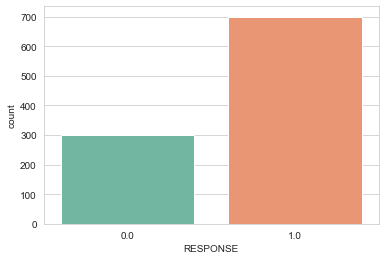

In [20]:
creditworthiness_count = df_data['RESPONSE'].value_counts()
creditworthiness_rate = (creditworthiness_count[1]/len(df_data['RESPONSE'].index))*100
print('creditworthiness Rate: {} \n'.format(creditworthiness_rate))


sns.countplot(x='RESPONSE', data = df_data, palette='Set2')

The binary variable RESPONSE will be the target variable in our credit worthiness model, while other variables will be used as predictors. 

We almost have a credit worthiness of 70%. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced.

# Univariate Analysis

In [21]:
#Univariate analysis for numerical data
def num_col_univariate_analysis(c):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(y=c, data=df_data)
  plt.show()

def cat_col_univariate_analysis(c):
  sns.catplot(y=c, data=df_data, kind="count")
  plt.show()

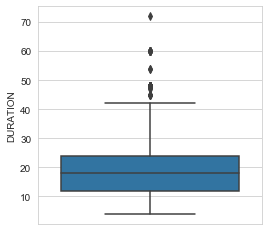

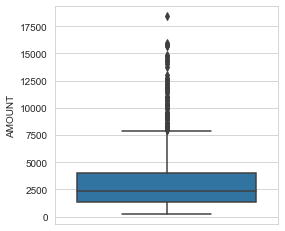

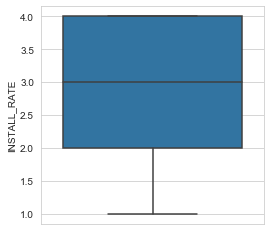

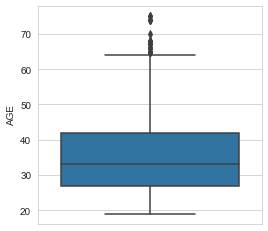

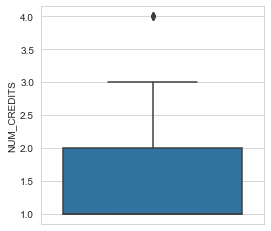

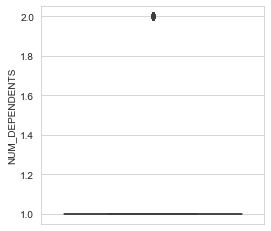

In [22]:
# Univariate Analysis of Numerical Columns
for c in n_col:
  num_col_univariate_analysis(c)

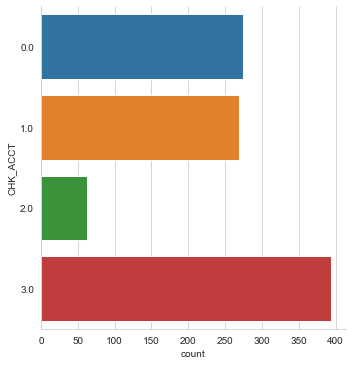

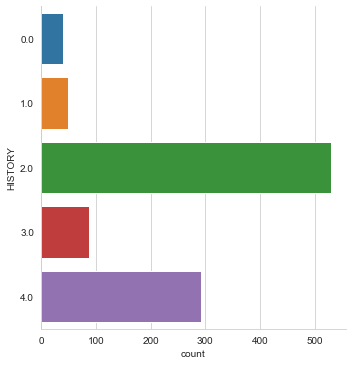

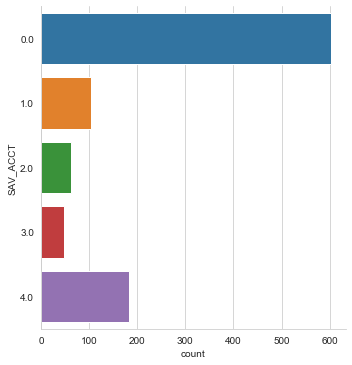

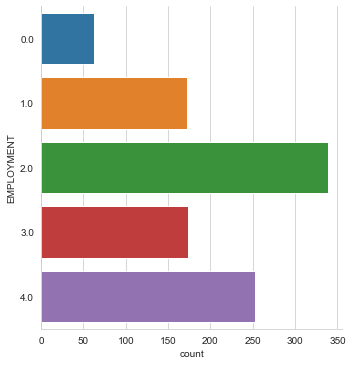

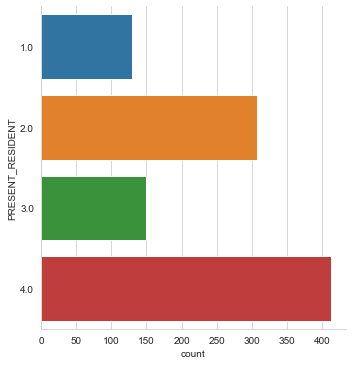

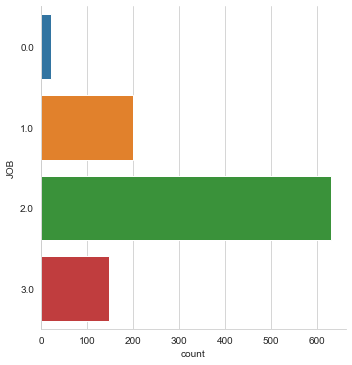

In [23]:
# Univariate Analysis of Categorical Columns
for c in c_col:
  cat_col_univariate_analysis(c)

From above we can see that People with no checking account is high.
People with existing credits paid back duly till now is high.
Many people with has average balance in savings account < 100DM.
Number of people with work exoerience of 1-4 years are more.
unskilled - residents are more.


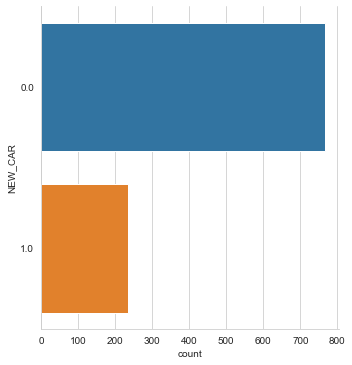

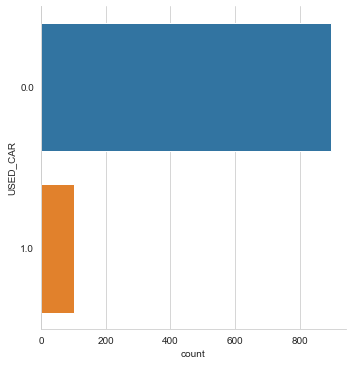

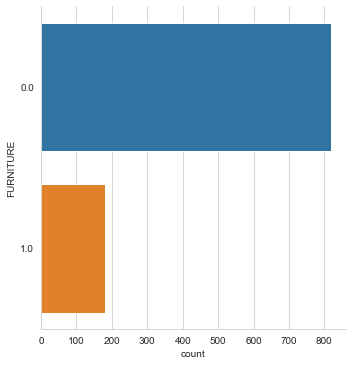

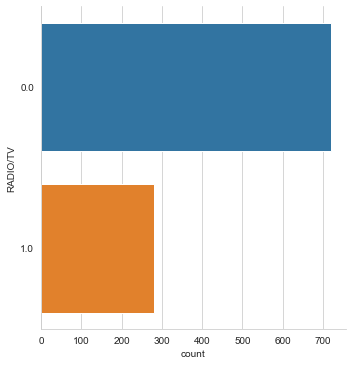

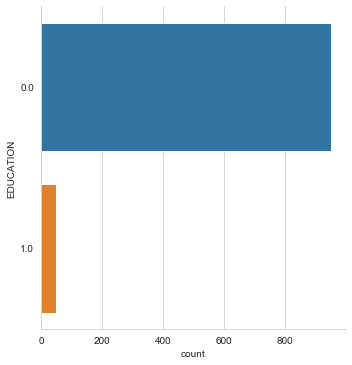

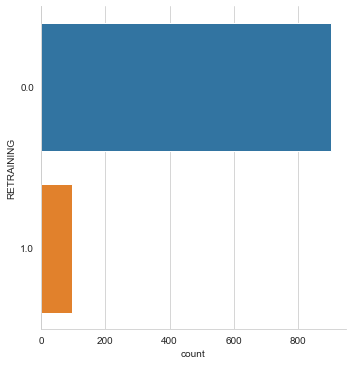

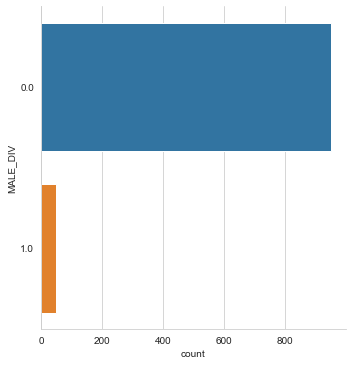

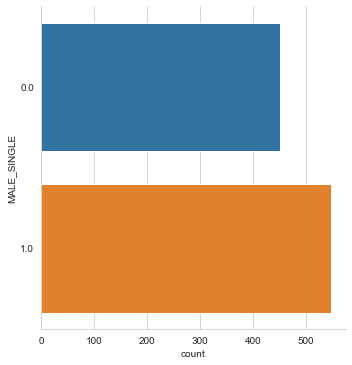

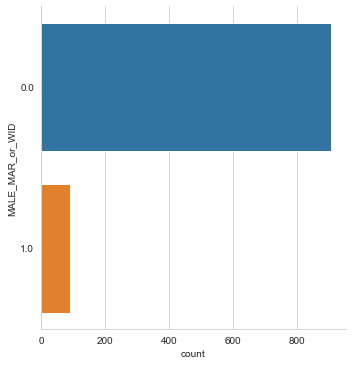

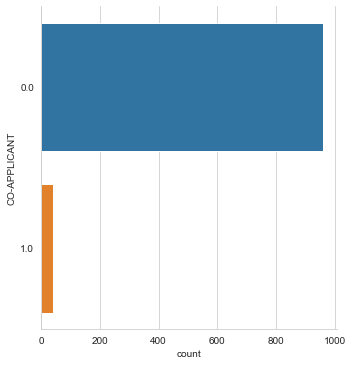

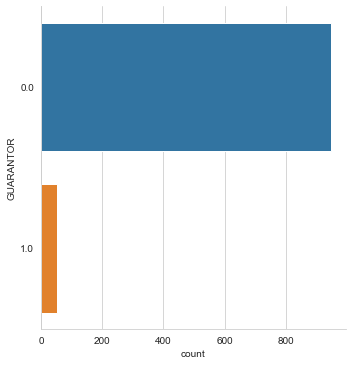

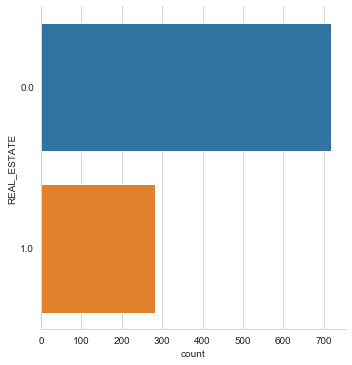

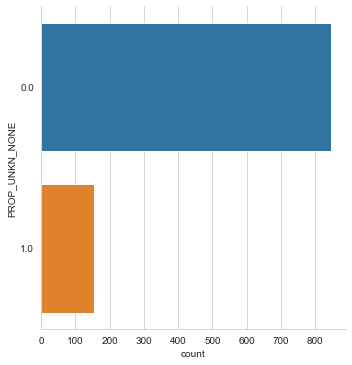

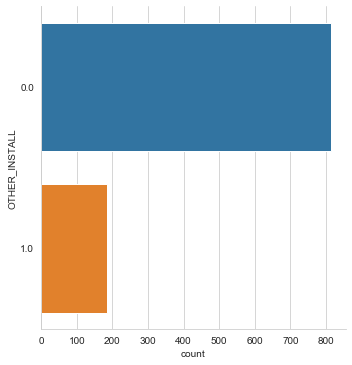

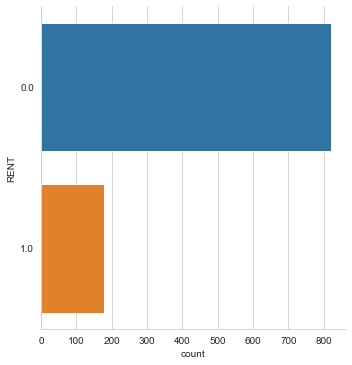

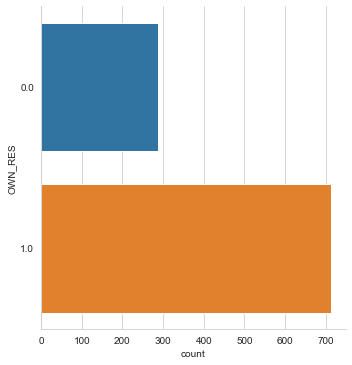

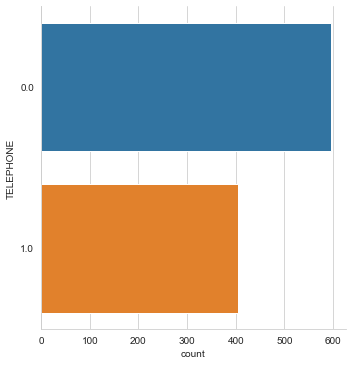

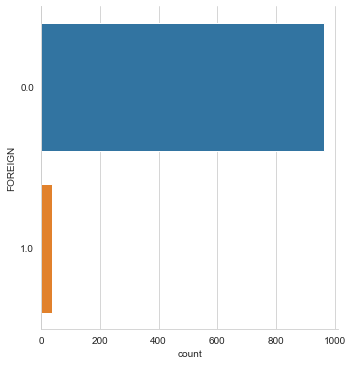

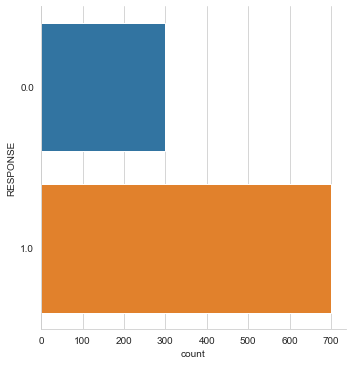

In [24]:
# Univariate Analysis of Binary Columns
for c in b_col:
  cat_col_univariate_analysis(c)

Number of people with no new car is more. Similarly from plot we can see which features are more dominating.

## Bivariate Analysis

In [25]:
def num_col_bivariate_analysis(c1,c2):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(x=c1, y=c2, data=df_data)
  plt.show()

def cat_col_bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=df_data, kind="count")
  plt.show()

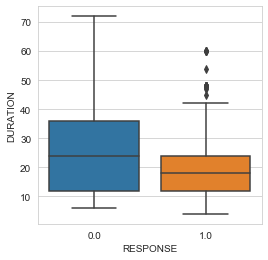

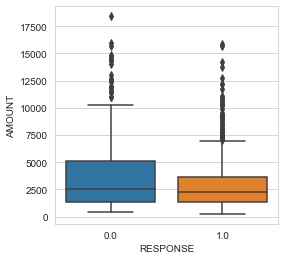

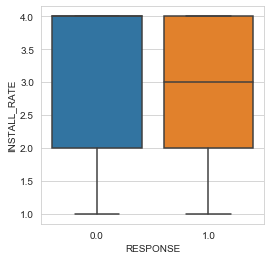

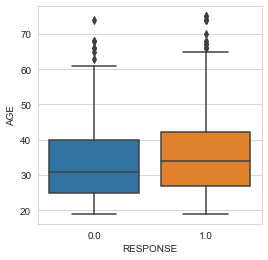

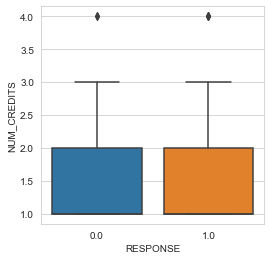

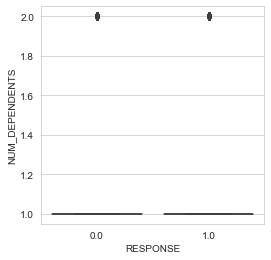

In [26]:
# Bivariate Analysis of Numerical Columns
for c in n_col:
  num_col_bivariate_analysis('RESPONSE',c)

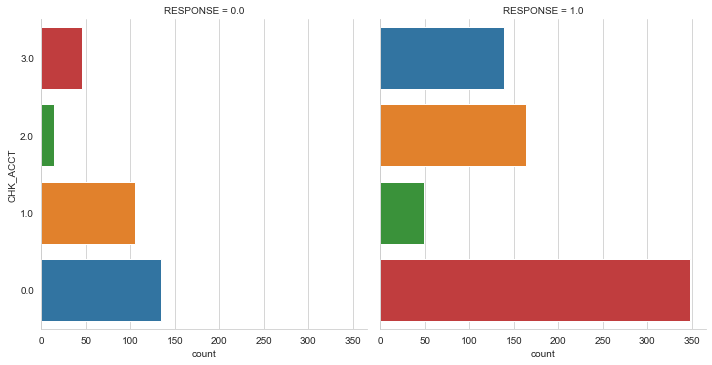

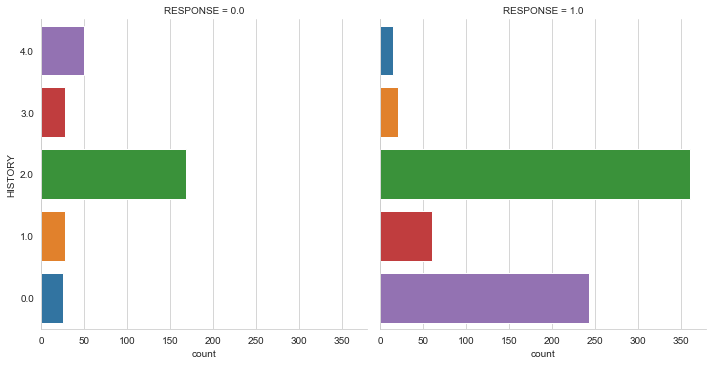

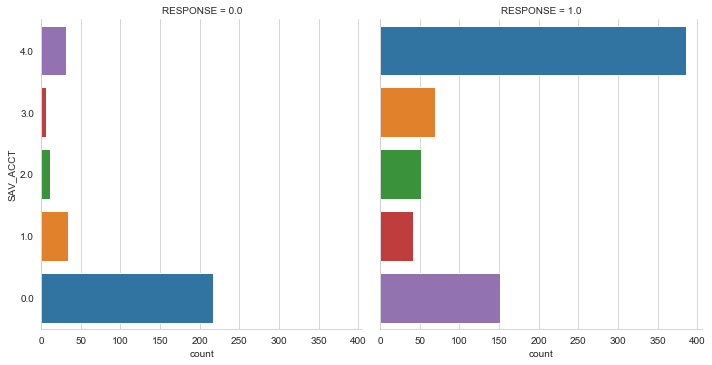

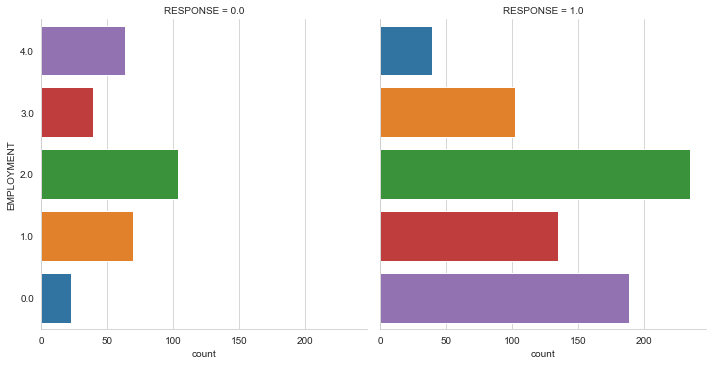

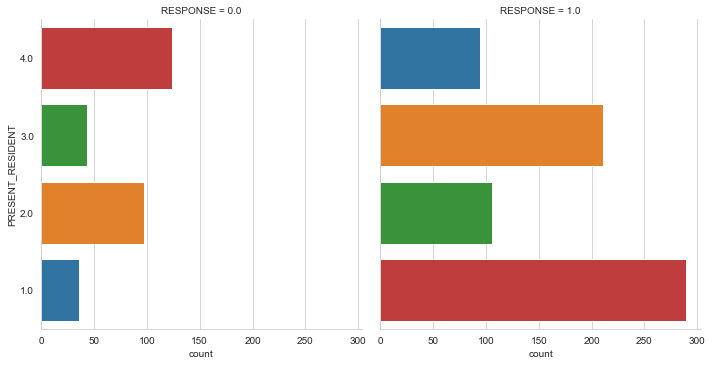

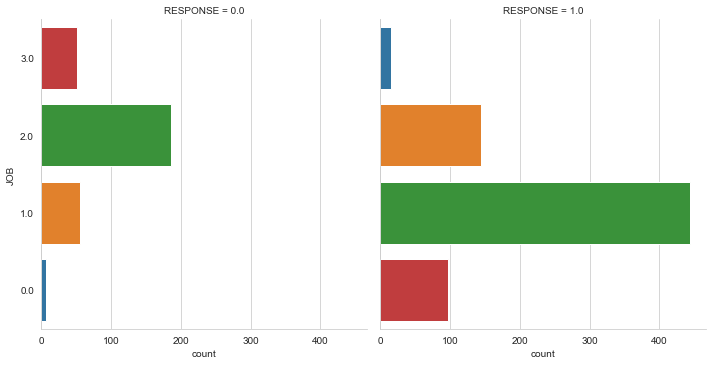

In [27]:
# Bivariate Analysis of Categorical Columns
for c in c_col:
  cat_col_bivariate_analysis('RESPONSE', c)

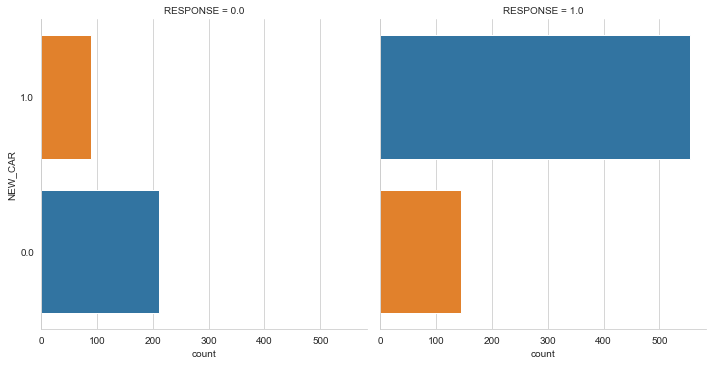

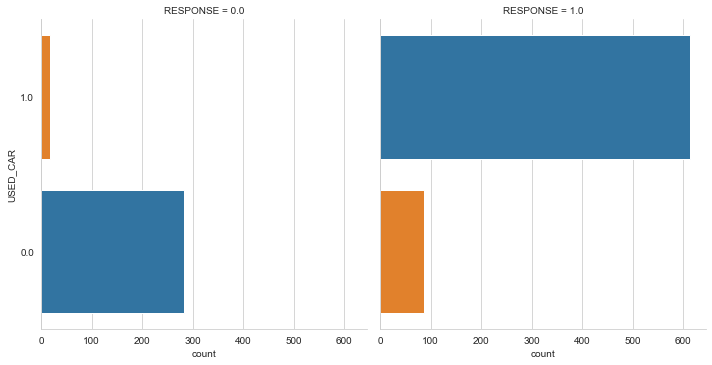

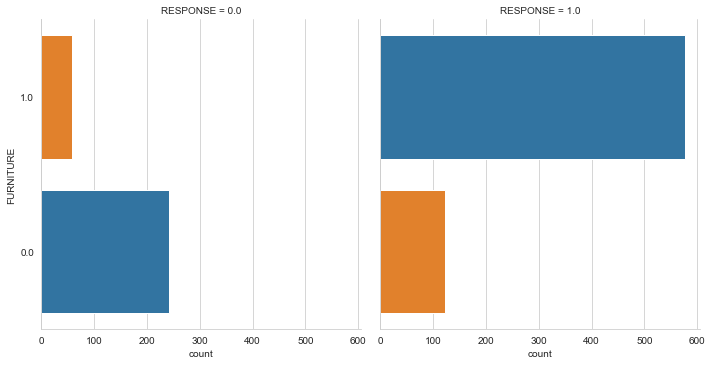

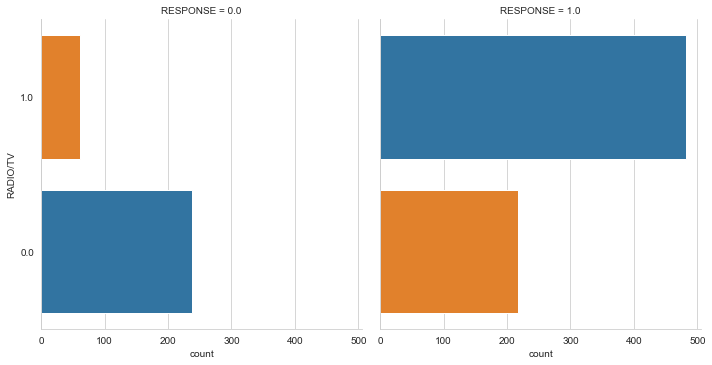

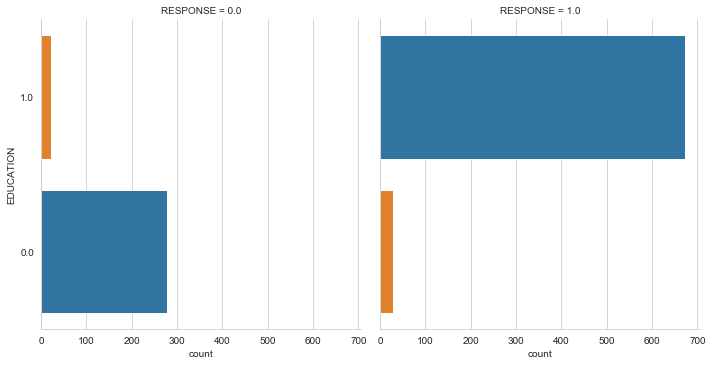

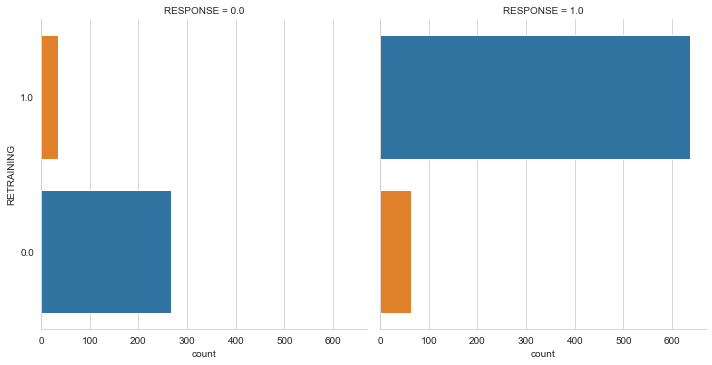

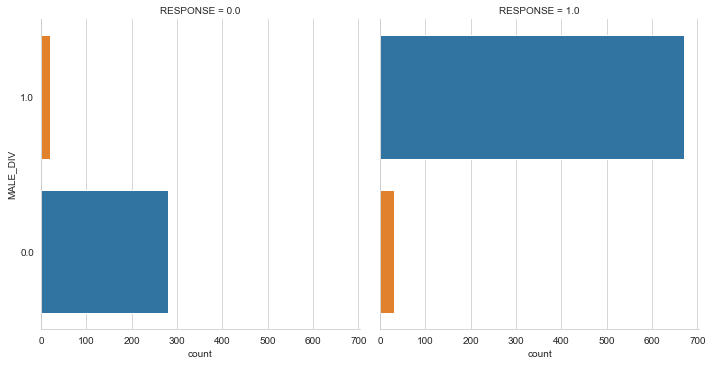

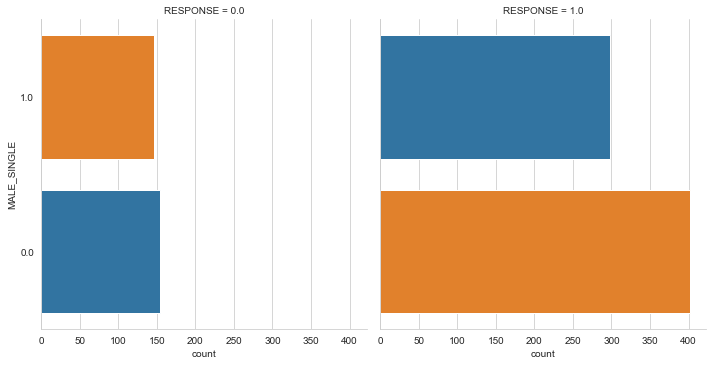

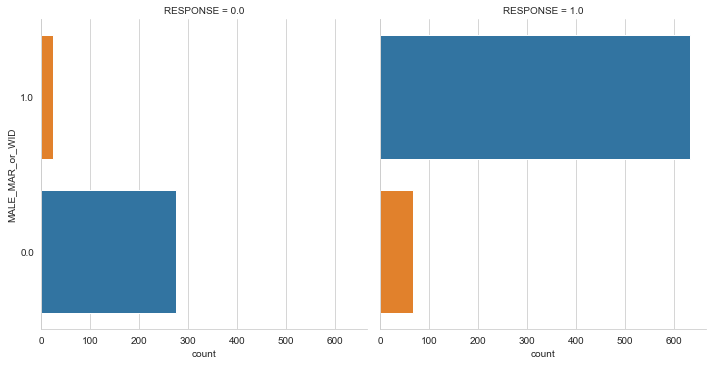

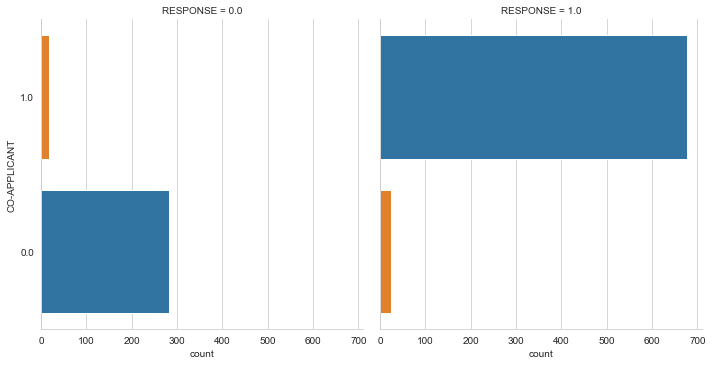

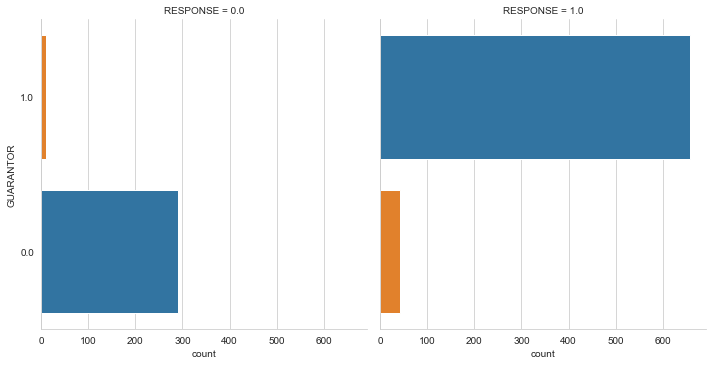

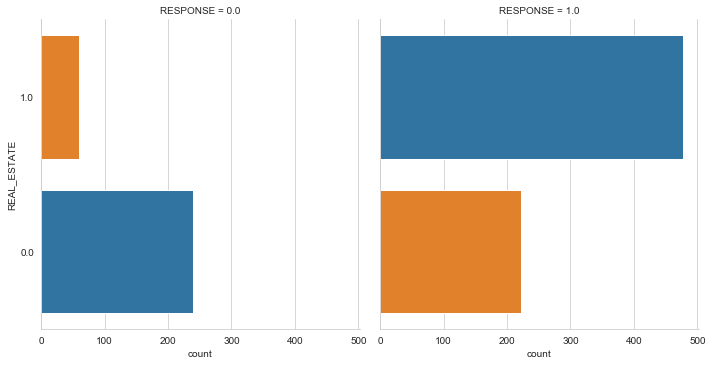

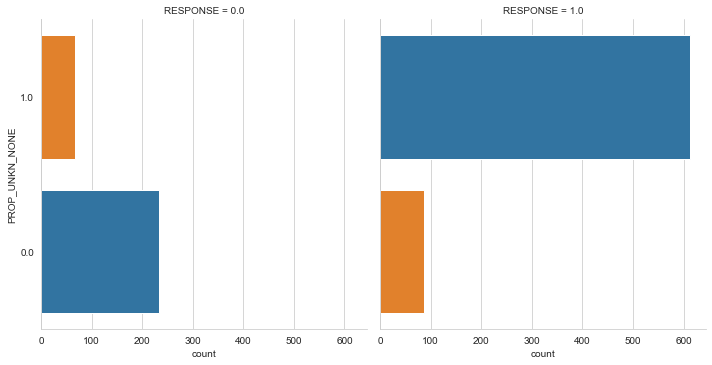

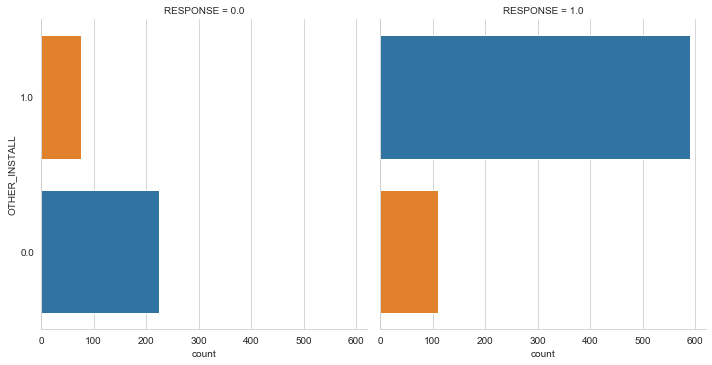

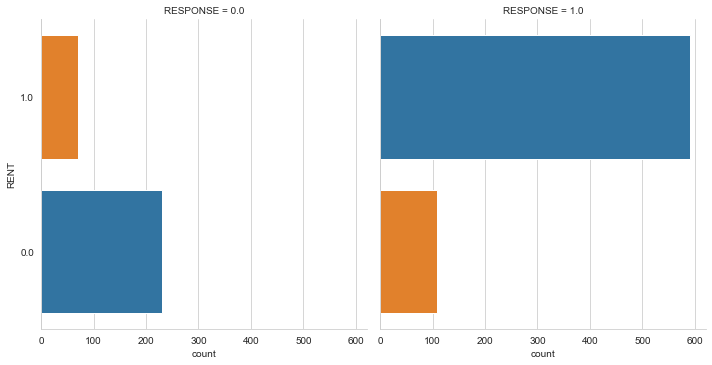

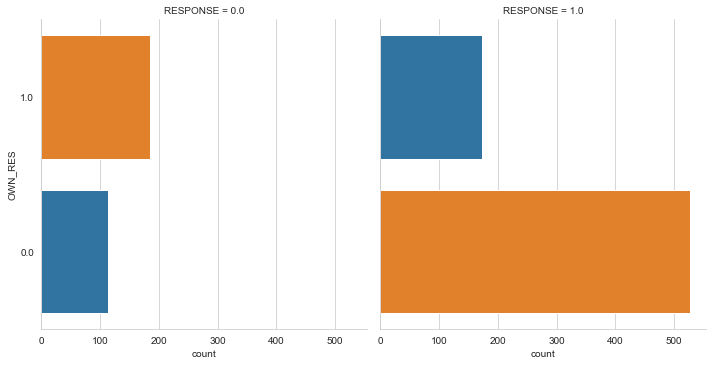

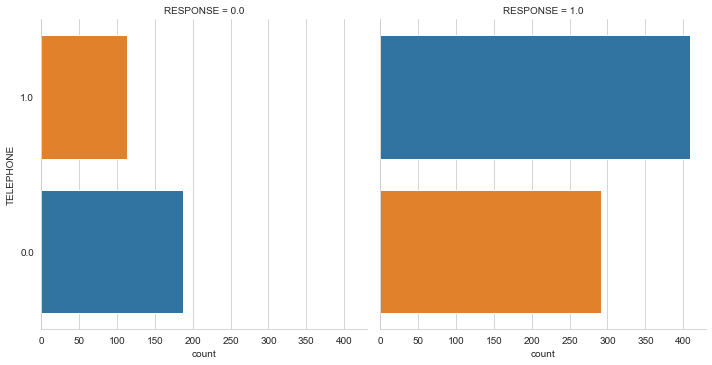

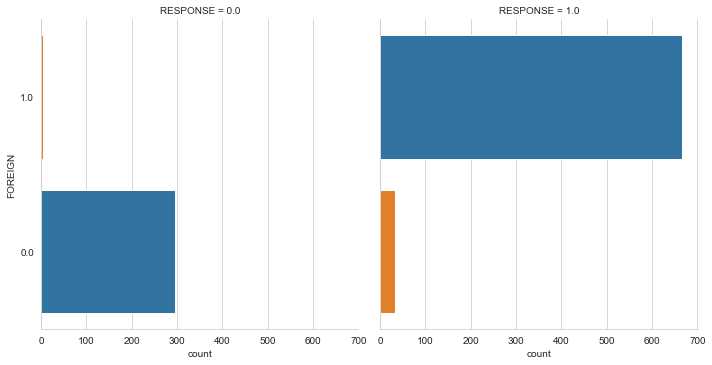

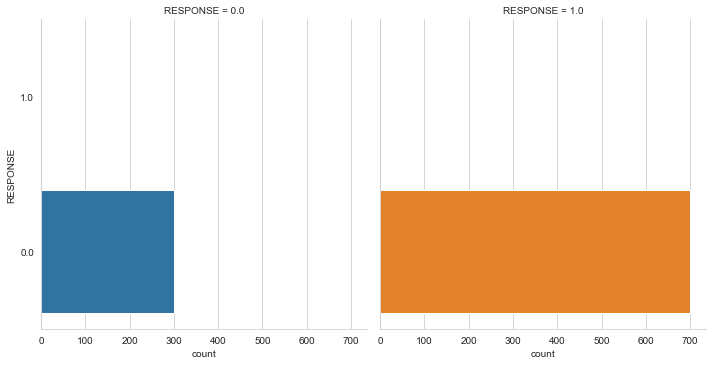

In [28]:
# Bivariate Analysis of Binary Columns
for c in b_col:
  cat_col_bivariate_analysis('RESPONSE', c)

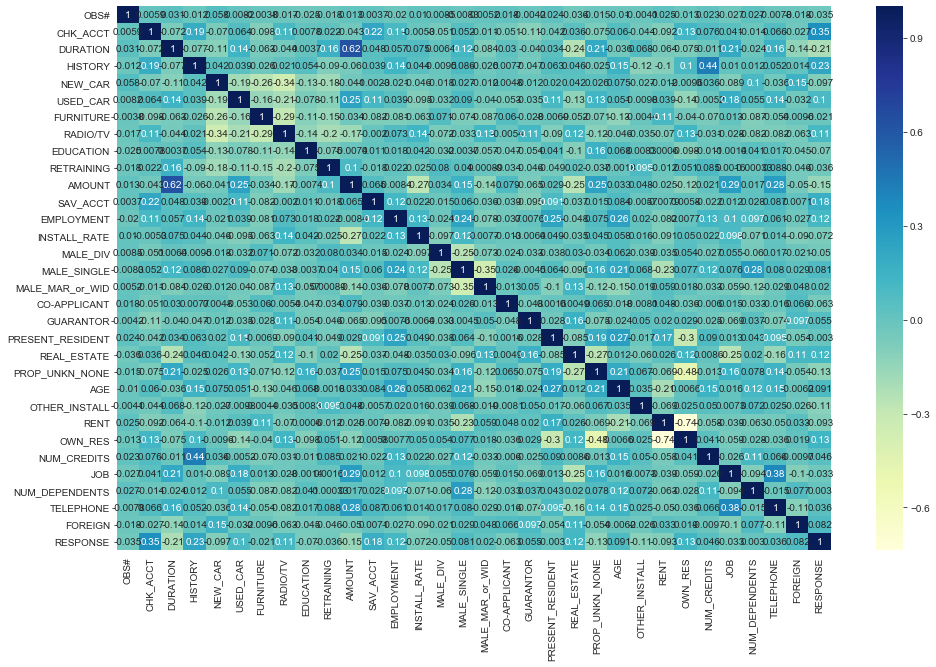

In [29]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(16, 10))
sns.heatmap(df_data.corr(), cmap="YlGnBu",annot=True)

Above we can see the correraltion matrix. Here we can see which features rae correlated positively and negatively.
Amount is highly correlated to Duration.

Num_credits is highly correlated to History.

OWN_RES is highly correlated to Rent and PROP_UNKN_NONE.



In [30]:
# Checking for outliers in the continuous variables
n_data = df_data[n_col]

# Checking outliers at 25%,50%,75%,90%,95% and 99%
n_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,DURATION,AMOUNT,INSTALL_RATE,AGE,NUM_CREDITS,NUM_DEPENDENTS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,42.000000,2.000000,1.000000
90%,36.000000,7179.400000,4.000000,52.000000,2.000000,2.000000
95%,48.000000,9162.700000,4.000000,60.000000,2.000000,2.000000
99%,60.000000,14180.390000,4.000000,67.010000,3.000000,2.000000


Summary:

There is a major class imbalance, and thus model built directly might be biased towards credit worthiness.

Univariate Analysis conveys that there are a lot of attributes which have very less variation.

Bivariate Analysis clearly reveals that is relate to 

Heatmaps clearly reveals that:
A lot of columns are related (and we can see patterns in heatmap), hence multicollinearity exist
None of the column have significant relation with the Response otherthan chk_amt.

From the data.describe distribution we can see that the numbers are gradually increasing so we can say there is no much outliers in our data.

## Handling Class Imbalance

There are multiple ways of handling class imbalance. Some of them are:

Up-sample the minority class
Down-sample the majority class
Change your performance metric
Penalize algorithms (cost-sensitive training)
Use tree-based algorithms

Here our class is imbalance as we have seen above in EDA section that credit worthiness is in the ration 7:3
But we are not going to use here any class balancing technique as dataset is very small for us.

## Scaling

In [31]:
from copy import copy
df1 = df_data[n_col].copy()
normalized_df=(df1-df1.mean())/df1.std()
df_data = df_data.drop(n_col, 1)
df_data = pd.concat([df_data,normalized_df],axis=1)
# df_data

Here we have standardize continuous variables i.e., n_col using Z-scores which defines how many standard deviations away from the mean your random variable is. We could have also used Min-Max Scalar but it is upto our choice completely.

In [32]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 32 columns):
OBS#                1000 non-null float64
CHK_ACCT            1000 non-null float64
HISTORY             1000 non-null float64
NEW_CAR             1000 non-null float64
USED_CAR            1000 non-null float64
FURNITURE           1000 non-null float64
RADIO/TV            1000 non-null float64
EDUCATION           1000 non-null float64
RETRAINING          1000 non-null float64
SAV_ACCT            1000 non-null float64
EMPLOYMENT          1000 non-null float64
MALE_DIV            1000 non-null float64
MALE_SINGLE         1000 non-null float64
MALE_MAR_or_WID     1000 non-null float64
CO-APPLICANT        1000 non-null float64
GUARANTOR           1000 non-null float64
PRESENT_RESIDENT    1000 non-null float64
REAL_ESTATE         1000 non-null float64
PROP_UNKN_NONE      1000 non-null float64
OTHER_INSTALL       1000 non-null float64
RENT                1000 non-null float64
OWN_RES     

Our Data is almost ready. Here we don't need Observation for our prediction so we will remove it.
Also, 'RESPONSE' column is our output y label so we will seperate that from our training dataset.

#### Starting with our first step, i.e. splitting the training and test set

In [33]:
from sklearn.model_selection import train_test_split

## Feature Selection

In [34]:
X= df_data.drop(['RESPONSE','OBS#'], axis=1)
y= df_data['RESPONSE']


In [35]:
X.columns

Index(['CHK_ACCT', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV',
       'EDUCATION', 'RETRAINING', 'SAV_ACCT', 'EMPLOYMENT', 'MALE_DIV',
       'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR',
       'PRESENT_RESIDENT', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL',
       'RENT', 'OWN_RES', 'JOB', 'TELEPHONE', 'FOREIGN', 'DURATION', 'AMOUNT',
       'INSTALL_RATE', 'AGE', 'NUM_CREDITS', 'NUM_DEPENDENTS'],
      dtype='object')

We have removed observation and response from the dataset and made a X dataset and we have kept Y as the label which contains Response column.
But we can see there are around 30 features in our dataset so we need to use automated feature selection technique i.e.,RFE (Recursive Feature Selection) to get the topemost few features.

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 20)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False False  True False  True False  True  True
 False  True  True False  True  True  True  True  True False  True  True
  True  True  True False False False]
[ 1  1  1  1 10  2  1  9  1  6  1  1  5  1  1 11  1  1  1  1  1  8  1  1
  1  1  1  3  4  7]


In [37]:
print(X.columns[rfe.support_])
# Below are the top 20 most relevant columns as per RFE

Index(['CHK_ACCT', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'EDUCATION', 'SAV_ACCT',
       'MALE_DIV', 'MALE_SINGLE', 'CO-APPLICANT', 'GUARANTOR', 'REAL_ESTATE',
       'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'TELEPHONE',
       'FOREIGN', 'DURATION', 'AMOUNT', 'INSTALL_RATE'],
      dtype='object')


In [38]:
col_byRFE=['CHK_ACCT', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'EDUCATION', 'SAV_ACCT',
       'MALE_DIV', 'MALE_SINGLE', 'CO-APPLICANT', 'GUARANTOR', 'REAL_ESTATE',
       'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'TELEPHONE',
       'FOREIGN', 'DURATION', 'AMOUNT', 'INSTALL_RATE']

Splitting the dataset into train,test. We can even make a validation set but it is done incase we have bigger dataset.

In [39]:
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state=100)

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 30)
(700,)
(300, 30)
(300,)


### Model Building

Model one: Logistic Regression

In [41]:
import statsmodels.api as sm


In [42]:
# Logistic regression model-Here we are using features selected by RFE
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col_byRFE])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               RESPONSE   No. Observations:                  700
Model:                            GLM   Df Residuals:                      679
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -315.19
Date:                Thu, 30 May 2019   Deviance:                       630.37
Time:                        11:20:38   Pearson chi2:                     688.
No. Iterations:                     6   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5210      0.617     -2.464      0.014      -2.731      -0.311
CHK_ACCT           0.5563      0.087      6.365      0.000       0.385       0.728
HISTORY            0.4243      0.098      4.308      0.000       0.231       0.617
NEW_CAR           -0.8783      0.240     -3.666      0.000      -1.348      -0.409
USED_CAR           1.1176      0.434      2.575      0.010       0.267       1.968
EDUCATION         -0.8738      0.441     -1.981      0.048      -1.738      -0.009
SAV_ACCT           0.2323      0.071      3.257      0.001       0.093       0.372
MALE_DIV          -0.3822      0.420     -0.910      0.363      -1.205       0.441
MALE_SINGLE        0.5843      0.221      2.644      0.008       0.151       1.017
CO-APPLICANT      -0.3484      0.472     -0.738      0.460      -1.274       0.577
GUARANTOR          1.2660      0.498      2.543      0.011       0.290       2.242
REAL_ESTATE        0.4205      0.246      1.709      0.088      -0.062       0.903
PROP_UNKN_NONE    -0.0906      0.466     -0.195      0.846      -1.004       0.822
OTHER_INSTALL     -0.6806      0.248     -2.746      0.006      -1.166      -0.195
RENT              -0.3694      0.552     -0.670      0.503      -1.451       0.712
OWN_RES            0.3396      0.526      0.646      0.518      -0.691       1.370
TELEPHONE          0.1474      0.218      0.677      0.498      -0.279       0.574
FOREIGN            1.0233      0.791      1.294      0.196      -0.527       2.573
DURATION          -0.3566      0.129     -2.770      0.006      -0.609      -0.104
AMOUNT            -0.3829      0.145     -2.642      0.008      -0.667      -0.099
INSTALL_RATE      -0.3961      0.115     -3.455      0.001      -0.621      -0.171
==================================================================================
"""

We will be using **VIF** and **p values** for feature selections. VIF must be less than 5 and p value must be =<0.05.

In [43]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [44]:
# Calculating Vif value for features by RFE
vif_cal(input_data=df_data[col_byRFE+['RESPONSE']], dependent_col='RESPONSE')

,Var,Vif
1,HISTORY,6.38
14,OWN_RES,6.26
0,CHK_ACCT,2.92
7,MALE_SINGLE,2.60
18,AMOUNT,2.27
17,DURATION,1.90
13,RENT,1.90
15,TELEPHONE,1.89
11,PROP_UNKN_NONE,1.79
10,REAL_ESTATE,1.63


From the above table we can see that the Vif of history,own_res are high so we will remove them one by one in every iteration along side we check the value of p. If p is negligibe then it is up to us if we want to remove the high VIF features or not.

In [45]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[col_byRFE])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               RESPONSE   No. Observations:                  700
Model:                            GLM   Df Residuals:                      679
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -315.19
Date:                Thu, 30 May 2019   Deviance:                       630.37
Time:                        11:20:38   Pearson chi2:                     688.
No. Iterations:                     6   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5210      0.617     -2.464      0.014      -2.731      -0.311
CHK_ACCT           0.5563      0.087      6.365      0.000       0.385       0.728
HISTORY            0.4243      0.098      4.308      0.000       0.231       0.617
NEW_CAR           -0.8783      0.240     -3.666      0.000      -1.348      -0.409
USED_CAR           1.1176      0.434      2.575      0.010       0.267       1.968
EDUCATION         -0.8738      0.441     -1.981      0.048      -1.738      -0.009
SAV_ACCT           0.2323      0.071      3.257      0.001       0.093       0.372
MALE_DIV          -0.3822      0.420     -0.910      0.363      -1.205       0.441
MALE_SINGLE        0.5843      0.221      2.644      0.008       0.151       1.017
CO-APPLICANT      -0.3484      0.472     -0.738      0.460      -1.274       0.577
GUARANTOR          1.2660      0.498      2.543      0.011       0.290       2.242
REAL_ESTATE        0.4205      0.246      1.709      0.088      -0.062       0.903
PROP_UNKN_NONE    -0.0906      0.466     -0.195      0.846      -1.004       0.822
OTHER_INSTALL     -0.6806      0.248     -2.746      0.006      -1.166      -0.195
RENT              -0.3694      0.552     -0.670      0.503      -1.451       0.712
OWN_RES            0.3396      0.526      0.646      0.518      -0.691       1.370
TELEPHONE          0.1474      0.218      0.677      0.498      -0.279       0.574
FOREIGN            1.0233      0.791      1.294      0.196      -0.527       2.573
DURATION          -0.3566      0.129     -2.770      0.006      -0.609      -0.104
AMOUNT            -0.3829      0.145     -2.642      0.008      -0.667      -0.099
INSTALL_RATE      -0.3961      0.115     -3.455      0.001      -0.621      -0.171
==================================================================================
"""

In [46]:
# p value of own_res is high so we removed it from RFE features list
col_byRFE=['CHK_ACCT', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'EDUCATION', 'SAV_ACCT',
       'MALE_DIV', 'MALE_SINGLE', 'CO-APPLICANT', 'GUARANTOR', 'REAL_ESTATE',
       'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT', 'TELEPHONE',
       'FOREIGN', 'DURATION', 'AMOUNT', 'INSTALL_RATE']

In [47]:
vif_cal(input_data=df_data[col_byRFE+['RESPONSE']], dependent_col='RESPONSE')

,Var,Vif
1,HISTORY,4.45
0,CHK_ACCT,2.75
7,MALE_SINGLE,2.45
17,AMOUNT,2.25
16,DURATION,1.89
14,TELEPHONE,1.84
5,SAV_ACCT,1.59
10,REAL_ESTATE,1.58
2,NEW_CAR,1.42
11,PROP_UNKN_NONE,1.40


From above table its clear that VIF are now in required range. Now we have to bring p values in required range or we have to drop the features with larger p values > 0.05

In [48]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train[col_byRFE])), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               RESPONSE   No. Observations:                  700
Model:                            GLM   Df Residuals:                      680
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -315.39
Date:                Thu, 30 May 2019   Deviance:                       630.79
Time:                        11:20:38   Pearson chi2:                     694.
No. Iterations:                     6   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1835      0.324     -3.648      0.000      -1.819      -0.548
CHK_ACCT           0.5560      0.087      6.365      0.000       0.385       0.727
HISTORY            0.4232      0.098      4.301      0.000       0.230       0.616
NEW_CAR           -0.8935      0.238     -3.747      0.000      -1.361      -0.426
USED_CAR           1.0844      0.429      2.526      0.012       0.243       1.926
EDUCATION         -0.8937      0.440     -2.033      0.042      -1.756      -0.032
SAV_ACCT           0.2362      0.071      3.318      0.001       0.097       0.376
MALE_DIV          -0.3724      0.420     -0.887      0.375      -1.195       0.450
MALE_SINGLE        0.5764      0.220      2.614      0.009       0.144       1.009
CO-APPLICANT      -0.3088      0.469     -0.659      0.510      -1.228       0.610
GUARANTOR          1.2551      0.495      2.534      0.011       0.284       2.226
REAL_ESTATE        0.4158      0.246      1.692      0.091      -0.066       0.898
PROP_UNKN_NONE    -0.3197      0.302     -1.059      0.290      -0.911       0.272
OTHER_INSTALL     -0.6740      0.248     -2.722      0.006      -1.159      -0.189
RENT              -0.6849      0.258     -2.653      0.008      -1.191      -0.179
TELEPHONE          0.1522      0.217      0.700      0.484      -0.274       0.578
FOREIGN            1.0309      0.790      1.304      0.192      -0.518       2.580
DURATION          -0.3578      0.129     -2.780      0.005      -0.610      -0.106
AMOUNT            -0.3840      0.145     -2.646      0.008      -0.668      -0.100
INSTALL_RATE      -0.3926      0.115     -3.427      0.001      -0.617      -0.168
==================================================================================
"""

In [49]:
# Removed all the columns from the list having greater p value. Now below are the features that we will consider for model building
col_byRFE=['CHK_ACCT', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'EDUCATION', 'SAV_ACCT','MALE_SINGLE', 'GUARANTOR', 'OTHER_INSTALL', 'RENT','DURATION', 'AMOUNT', 'INSTALL_RATE']

In [50]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col_byRFE])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               RESPONSE   No. Observations:                  700
Model:                            GLM   Df Residuals:                      686
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -319.69
Date:                Thu, 30 May 2019   Deviance:                       639.39
Time:                        11:20:38   Pearson chi2:                     726.
No. Iterations:                     5   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.1386      0.301     -3.779      0.000      -1.729      -0.548
CHK_ACCT          0.5682      0.086      6.571      0.000       0.399       0.738
HISTORY           0.4286      0.097      4.420      0.000       0.239       0.619
NEW_CAR          -0.8619      0.234     -3.682      0.000      -1.321      -0.403
USED_CAR          1.0781      0.422      2.557      0.011       0.252       1.904
EDUCATION        -1.0448      0.429     -2.436      0.015      -1.885      -0.204
SAV_ACCT          0.2372      0.070      3.381      0.001       0.100       0.375
MALE_SINGLE       0.5956      0.210      2.838      0.005       0.184       1.007
GUARANTOR         1.4578      0.487      2.993      0.003       0.503       2.412
OTHER_INSTALL    -0.6405      0.245     -2.609      0.009      -1.122      -0.159
RENT             -0.6289      0.252     -2.497      0.013      -1.123      -0.135
DURATION         -0.4049      0.126     -3.205      0.001      -0.653      -0.157
AMOUNT           -0.4214      0.139     -3.026      0.002      -0.694      -0.148
INSTALL_RATE     -0.3919      0.112     -3.498      0.000      -0.611      -0.172
=================================================================================
"""

Now we will use logistic regression for finding the model accuracy

In [51]:
# Here we rae using all the feature that were initially given in the dataset

import numpy as np
stratefied_Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-5, 5))),
        scoring='accuracy',
        cv=stratefied_Kfold,
        random_state=100,
        solver='saga',
        n_jobs=-1
    )

# Training on Train Dataset
searchCV.fit(X_train,y_train)

LogisticRegressionCV(Cs=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                         1000.0, 10000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='warn',
                     n_jobs=-1, penalty='l2', random_state=100, refit=True,
                     scoring='accuracy', solver='saga', tol=0.0001, verbose=0)

In [52]:
# Evaluation on Test Dataset
predictions = searchCV.predict(X_test)

# Detailed report of classification done by model
print(metrics.classification_report(y_test, predictions))
print(f'Accuracy for the test dataset {metrics.accuracy_score(y_test, predictions):.1%}')
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
print(f'ROC for the test dataset {metrics.auc(fpr, tpr):.1%}')

              precision    recall  f1-score   support

         0.0       0.55      0.44      0.49        81
         1.0       0.81      0.87      0.84       219

    accuracy                           0.75       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300

Accuracy for the test dataset 75.3%
ROC for the test dataset 65.6%


From above we can see that recall for 1 (credit worthiness) is 87%. So its good. But we will explore more. We will see what will be accurary if we use the logostic regression of eliminated features dataset.

In [53]:
import numpy as np
stratefied_Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-5, 5))),
        scoring='accuracy',
        cv=stratefied_Kfold,
        random_state=100,
        solver='saga',
        n_jobs=-1
    )

# Training on Train Dataset
searchCV.fit(X_train[col_byRFE],y_train)

LogisticRegressionCV(Cs=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                         1000.0, 10000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='warn',
                     n_jobs=-1, penalty='l2', random_state=100, refit=True,
                     scoring='accuracy', solver='saga', tol=0.0001, verbose=0)

In [56]:
# Evaluation on Test Dataset
predictions = searchCV.predict(X_test[col_byRFE])

# Detailed report of classification done by model
print(metrics.classification_report(y_test, predictions))
print(f'Accuracy for the test dataset {metrics.accuracy_score(y_test, predictions):.1%}')
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
print(f'ROC for the test dataset {metrics.auc(fpr, tpr):.1%}')

#We are getting almost same accurary and recall.

              precision    recall  f1-score   support

         0.0       0.55      0.46      0.50        81
         1.0       0.81      0.86      0.84       219

    accuracy                           0.75       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.74      0.75      0.75       300

Accuracy for the test dataset 75.3%
ROC for the test dataset 66.0%


In [57]:
# Using simple Logistic regression on complete dataset
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logR = LogisticRegression(C=1e9)
logR.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred = logR.predict(X_test)

In [59]:
confusion = metrics.confusion_matrix( y_test , y_pred)
confusion

array([[ 41,  40],
       [ 32, 187]], dtype=int64)

In [60]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_test , y_pred)

# Almost same accuray of around 76% in Logistic Regression is obtained. Now will try different models.


0.76

Using SVM

In [61]:
# rbf kernel with other hyperparameters kept to default 
svm_rbf = svm.LinearSVC(random_state=100, dual=False, class_weight='balanced')

In [62]:
# Train on Training Dataset
svm_rbf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=100, tol=0.0001,
          verbose=0)

In [63]:
# Predict on Test Dataset
predictions = svm_rbf.predict(X_test)

In [64]:
# accuracy 
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))
#recall
print(metrics.recall_score(y_true=y_test, y_pred=predictions))

# In SVM also we have got almost same result. Now we will use Random Forest which is one of the best algorithm.

0.6833333333333333
0.7031963470319634


**Random Forest**

In [65]:
RFC_balanced = RandomForestClassifier(random_state=100, oob_score=True, class_weight="balanced_subsample")

In [66]:
# Training model from Test Dataset
RFC_balanced.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=True,
                       random_state=100, verbose=0, warm_start=False)

In [67]:
# Making predictions on Test Dataset
predictions=RFC_balanced.predict(X_test)

# Detailed report of classification done by model
print(metrics.classification_report(y_test, predictions))
print(f'Accuracy for the test dataset {metrics.accuracy_score(y_test, predictions):.1%}')
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
print(f'ROC for the test dataset {metrics.auc(fpr, tpr):.1%}')

              precision    recall  f1-score   support

         0.0       0.49      0.53      0.51        81
         1.0       0.82      0.80      0.81       219

    accuracy                           0.73       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.73      0.73      0.73       300

Accuracy for the test dataset 72.7%
ROC for the test dataset 66.5%


**Identifying the main indicators of churn**

We will perform the following steps (on complete data):

Using Logistic Regression to identify indicators of churn
Using Decision Trees to identify indicators of churn
Using Random Forest to identify the indicators of churn

In [68]:
# Using Logistic Regression to identify indicators of creditworthiness

stratefied_Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-5, 5))),
        scoring='accuracy',
        cv=stratefied_Kfold,
        random_state=100,
        solver='saga',
        n_jobs=-1
    )

# Training on Train Dataset
searchCV.fit(X_train,y_train)

LogisticRegressionCV(Cs=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                         1000.0, 10000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='warn',
                     n_jobs=-1, penalty='l2', random_state=100, refit=True,
                     scoring='accuracy', solver='saga', tol=0.0001, verbose=0)

In [69]:
# Evaluation on Test Dataset
predictions = searchCV.predict(X_test)

# Detailed report of classification done by model
print(metrics.classification_report(y_test, predictions))
print(f'Accuracy for the test dataset {metrics.accuracy_score(y_test, predictions):.1%}')
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
print(f'ROC for the test dataset {metrics.auc(fpr, tpr):.1%}')

              precision    recall  f1-score   support

         0.0       0.55      0.44      0.49        81
         1.0       0.81      0.87      0.84       219

    accuracy                           0.75       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300

Accuracy for the test dataset 75.3%
ROC for the test dataset 65.6%


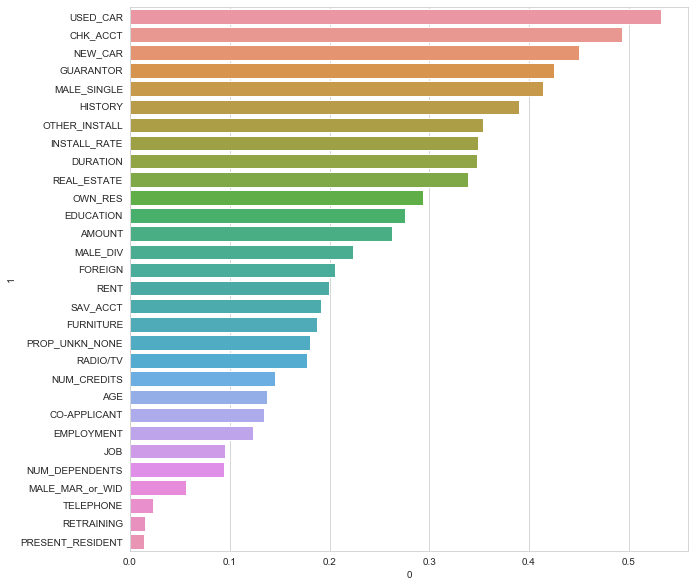

In [70]:
# Plotting top 30 features 
features = list(zip(abs(searchCV.coef_[0]),df_data.drop(['RESPONSE','OBS#'], axis = 1).columns))
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=0, y=1, data=pd.DataFrame(sorted(features, reverse=True)[:30]))
plt.show()

In [71]:
# Using Random Forest to identify indicators of churn

# Making final model with best parameters obtained in previous HyperParameter optimization
rfc_final = RandomForestClassifier(max_depth=14, random_state=100, oob_score=True, class_weight="balanced_subsample")

# Training model from Training Dataset
rfc_final.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=True,
                       random_state=100, verbose=0, warm_start=False)

In [72]:
# Making predictions on Test Dataset
predictions=rfc_final.predict(X_test)

# Detailed report of classification done by model
print(metrics.classification_report(y_test, predictions))
print(f'Accuracy for the test dataset {metrics.accuracy_score(y_test, predictions):.1%}')
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
print(f'ROC for the test dataset {metrics.auc(fpr, tpr):.1%}')

              precision    recall  f1-score   support

         0.0       0.47      0.53      0.50        81
         1.0       0.82      0.78      0.80       219

    accuracy                           0.71       300
   macro avg       0.64      0.65      0.65       300
weighted avg       0.72      0.71      0.72       300

Accuracy for the test dataset 71.0%
ROC for the test dataset 65.4%


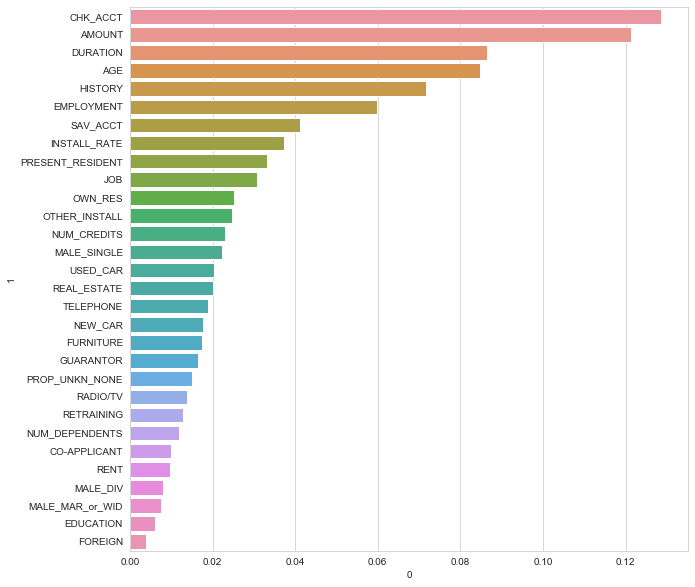

In [73]:
# Plotting top 30 features 
features = list(zip(abs(rfc_final.feature_importances_),df_data.drop(['RESPONSE','OBS#'], axis = 1).columns))
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=0, y=1, data=pd.DataFrame(sorted(features, reverse=True)[:30]))
plt.show()

We can see in the above figure that the major factors that play role in our decision contains CHK_ACCT, AMOUNT, DURATION, AGE, HISTORY, EMPLOYMENT, SAV_ACCT, INSTALL_RATE.

**Summary**

As per our business requirement, accuracy and precision parameters could be decent.
As per our business requirement, we need the recall parameter for creditworthiness that is RESPONSE =1 to be ideally 100%.

We have seen that almost in all the models we have got the accuracy of about 70-75% and recall as 80-84%.
We can still work on improving the accuracy by various techniques. Random Forest might have shown good accurary but it needs huge dataset to learn the features.
So, we have created various models and have seen their accuracy.